# Bool
закодировать
# Questions
result_name оставить нул?

# Импорт основных библиотек и датасета

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# graph
import networkx as nx
from pyvis.network import Network

In [3]:
PATHES = ["./with_closed_ations_as________select_app_2018_X5_STORES.csv", "./with_closed_ations_as________select_app_2019_X5_STORES.csv", "./with_closed_ations_as________select_app_2020_X5_STORES.csv"]
# df = pd.read_csv(PATH)
df = pd.DataFrame()
for path in PATHES:
    df1 = pd.read_csv(path)
    df = pd.concat([df, df1])
    
df['action_date'] = pd.to_datetime(df['action_date'])
df = df[df['position_name'] == 'Продавец-кассир']

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df2020 = pd.read_csv(PATHES[2])
df2020 = df2020[df2020['position_name'] == 'Продавец-кассир']

# Предобработка

In [4]:
# df[df['activity_name'] == 'Провести гайд-интервью НОО']
# df = df[df['position_name'] == 'Продавец-кассир']

# Предварительный анализ

In [5]:
df['activity_name'].unique()

array([nan, 'Узнать результаты СБ', 'Провести первичную обработку',
       'Назначить время на оформление/медосмотр',
       'Подготовить анкету кандидата',
       'Узнать результаты интервью с руководителем',
       'Назначить интервью с руководителем', 'Проверка источника',
       'Узнать результаты приема',
       'Назначить время на оформление/медосмотр (недозвон)',
       'Вернуть в воронку', 'Проверка формы обращения',
       'Узнать результаты медосмотра',
       'Получить согласование повторного приема и отправить в СБ',
       'Назначить время на оформление', 'Вывести из черного списка',
       'Проверить выход на работу', 'Узнать результаты гайд-интервью',
       'Назначить время для гайд-интервью',
       'Узнать результаты группового собеседования и тестирования',
       'Назначить групповое собеседование и тестирование',
       'Предоставить обратную связь по кандидату'], dtype=object)

In [6]:
# df

In [7]:
# df.duplicated().sum()
# 0
# df[(df.duplicated(subset=['id_applicant','activity_name'], keep=False)&(df['id_applicant'] == 2753698))]
# df.sort_values(by=['id_applicant'], ascending = False)
# df[df['id_applicant'] == 2753698].sort_values(by=['action_date'], ascending = True)

In [8]:
df.isna().sum()

id_applicant              0
id_partner                0
id_log                    0
department_id             0
action_date               0
stage_name                0
activity_name       2244130
result_name         2300885
position_name             0
is_active_action          0
is_open_action            0
dtype: int64

In [9]:
print(len(df[df['stage_name'] == 'Создание кандидата']))
print(df[df['stage_name'] == 'Создание кандидата'].isna().sum())

1734982
id_applicant              0
id_partner                0
id_log                    0
department_id             0
action_date               0
stage_name                0
activity_name       1734982
result_name         1734982
position_name             0
is_active_action          0
is_open_action            0
dtype: int64


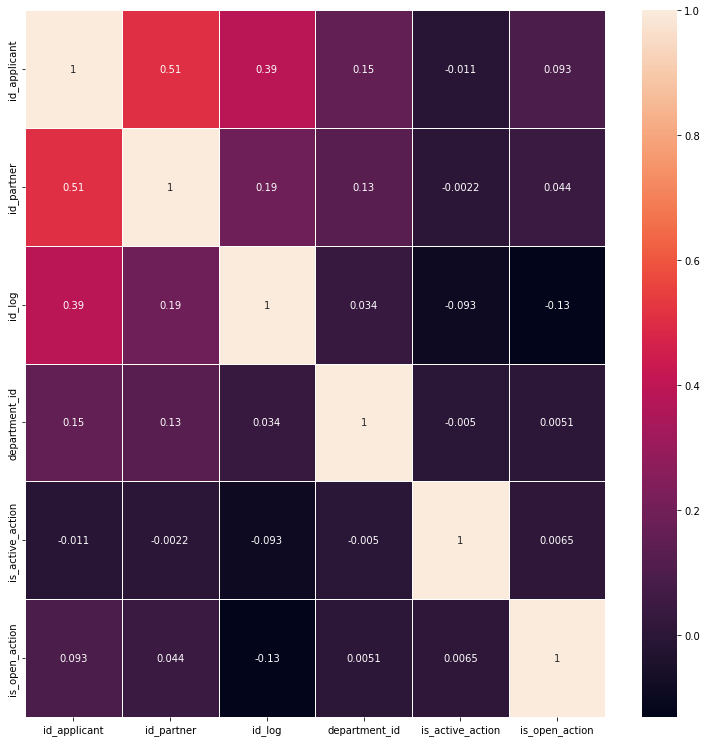

In [10]:
plt.subplots(figsize=(13,13))
sns.heatmap(df.corr(),annot=True,linewidths = 1)
plt.show()

In [11]:
from collections import Counter
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
# positions = df['position_name'].unique()
column_name = 'result_name'
df_temp = df_fits[df_fits[column_name].notna()]
position_counts = Counter(df_temp[column_name])
df_pos =  df_temp.from_dict(position_counts, orient='index')
df_pos = df_pos.sort_values(by=[0], ascending = False)

plt.figure(figsize=(20, 20))
df_pos[df_pos[0]>10].plot(kind='bar')

NameError: name 'df_fits' is not defined

In [ ]:
print(column_name)
df_pos[df_pos[0]>0]

# изменение bool значений

In [4]:
df["is_active_action"] = df.is_active_action.replace({True: 1, False: 0})
df["is_open_action"] = df.is_open_action.replace({True: 1, False: 0})
df

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
0,3080432,2883423,-1,9044,2018-10-16 18:11:10.003180+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
1,2873477,2761171,-1,32087,2018-08-15 10:36:32.936322+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
2,2896621,2776555,-1,32087,2018-08-22 14:09:27.083354+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
3,2906437,2782282,-1,32087,2018-08-24 15:55:27.912704+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
4,2965200,2816229,-1,32087,2018-09-11 15:00:49.242929+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
...,...,...,...,...,...,...,...,...,...,...,...
739675,4825142,2952699,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739676,4736341,936507,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739678,4782853,2753502,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739679,4769924,3823657,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1


# Статистика

In [5]:
df = df[df['is_active_action'] == 1]

In [6]:
# Сортируем по аппликантам и по времени
df.sort_values(by=['id_applicant','action_date'], ascending = [False,True], inplace = True)
df.reset_index(drop = True, inplace = True)

# action_time
indexes = pd.RangeIndex(len(df) - 1)
df['action_time'] = (df.iloc[indexes + 1]['action_date'].reset_index(drop = True) - df['action_date']).dt.total_seconds()/60/60/24 # In days
df['action_time'].iloc[df[df['id_applicant'] !=  df.iloc[indexes+1].append({'id_applicant': 0}, ignore_index = True)['id_applicant'].reset_index(drop = True)].index] = None

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [91]:
# df.iloc[df[(df['result_name']=='Принят') & (df['action_time'].notna())].index]
# & (df['stage_name']=='Оформление'

In [7]:
df.loc[df['result_name'] == 'Принят', 'is_fits'] = 1
df['is_fits'].fillna(0, inplace = True)
df['is_fits'].mean()

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a cop

0.018807529887609212

In [8]:
applicants_fits =  df.groupby(['id_applicant'])['is_fits'].sum()
applicants_fits.describe()

count    1.733977e+06
mean     1.161053e-01
std      3.206698e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: is_fits, dtype: float64

In [9]:
df['id_applicant'][df['id_applicant'].isin(applicants_fits[applicants_fits > 1].index)].unique()
# Очень странные значения!!! Когда два раза принимают там в основном второе оформление - после выхода на работу
# Можете смотреть тут
# df[df['id_applicant'].isin([4041842])]

array([4817187, 4146119, 4132727, 4119510, 4114537, 4086337, 4083165,
       3914800, 3900496, 3808420, 3759612, 3748619, 3708842, 3704415,
       3613254, 3601555, 3572361, 3570959, 3552996, 3496861, 3487419,
       3480238, 3445879, 3445063, 3419692, 3411446, 3407438, 3396031,
       3373318, 3358216, 3347242, 3331570, 3295872, 3288896, 3282528,
       3279024, 3253074, 3227324, 3212361, 3178947, 3172759, 3165610,
       3162393, 3155569, 3128634, 3107620, 3098526, 3071653, 3070075,
       3066122, 3060241, 3053811, 3052163, 3049030, 3047863, 3047032,
       3040460, 3039434, 3033759, 3030250, 3017987, 3015405, 3014957,
       3011417, 3002160, 3002046, 2990550, 2980768, 2977544, 2971886,
       2965937, 2965497, 2965215, 2962926, 2948463, 2944266, 2938026,
       2937049, 2935159, 2933942, 2931081, 2928419, 2921079, 2917385,
       2916486, 2908901, 2904646, 2902027, 2895511, 2890807, 2890698,
       2881795, 2879700, 2876527, 2862455, 2859958, 2854265, 2850518,
       2849564, 2845

In [10]:
df_fits = df[df['id_applicant'].isin(applicants_fits[applicants_fits > 0].index)].reset_index()
df_fits = df_fits[df_fits['is_active_action'] == 1]
df_fits.describe()

,index,id_applicant,id_partner,id_log,department_id,is_active_action,is_open_action,action_time,is_fits
count,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2400247.0,2.400247e+06,2.199099e+06,2.400247e+06
mean,5.329407e+06,3.280235e+06,2.709437e+06,1.577098e+07,2.203810e+04,1.0,6.249357e-06,1.191580e+00,8.387637e-02
std,2.899277e+06,6.037361e+05,6.683275e+05,5.887423e+06,1.214382e+04,0.0,2.499864e-03,7.970328e+00,2.772024e-01
min,0.000000e+00,2.196746e+06,5.305870e+05,-1.000000e+00,5.637000e+03,1.0,0.000000e+00,1.396991e-08,0.000000e+00
25%,2.808272e+06,2.775263e+06,2.497976e+06,1.347877e+07,1.008500e+04,1.0,0.000000e+00,1.080026e-05,0.000000e+00
50%,5.312441e+06,3.290447e+06,2.818420e+06,1.643617e+07,2.406800e+04,1.0,0.000000e+00,9.651384e-05,0.000000e+00
75%,7.814420e+06,3.759099e+06,3.181783e+06,1.967039e+07,3.217700e+04,1.0,0.000000e+00,7.662988e-01,0.000000e+00
max,1.070443e+07,4.886615e+06,3.897229e+06,2.710603e+07,4.985900e+04,1.0,1.000000e+00,8.111587e+02,1.000000e+00


In [54]:
df_fits['Date_int'] = df_fits['action_date'].values.astype('int64')
partner_applicant =  df_fits.groupby(['id_partner','id_applicant'])['Date_int'].max().reset_index()
amount_applicant =  partner_applicant.groupby(['id_partner'])['Date_int'].max().reset_index()
partner_applicant = partner_applicant[partner_applicant['Date_int'].isin(amount_applicant['Date_int'])]

df_fits = df_fits[df_fits['id_applicant'].isin(partner_applicant['id_applicant'])]

In [56]:
len(df_fits['id_applicant'].unique())

193767

In [17]:
partner_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
amount_applicant =  partner_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
partner_applicant.set_index('id_partner', inplace = True)
amount_applicant[amount_applicant['id_applicant']>2]

,id_partner,id_applicant
167,545345,3
192,546458,5
960,592992,3
1209,607894,3
1303,613092,3
...,...,...
176704,3399828,3
183469,3454509,3
184588,3464446,3
188985,3775478,3


In [32]:
amount_applicant['id_partner'][amount_applicant['id_applicant']>2].array

<PandasArray>
[ 545345,  546458,  592992,  607894,  613092,  651745,  653256,  705081,
  746284,  747915,
 ...
 3216484, 3225787, 3259803, 3289669, 3380308, 3399828, 3454509, 3464446,
 3775478, 3793714]
Length: 245, dtype: int64

In [37]:
partner_applicant.iloc[0]

id_applicant    2562674
0                     8
Name: 530587, dtype: int64

In [35]:
partner_applicant.iloc[]

,id_applicant,0
id_partner,,
530587,2562674,8
530898,3162450,9
530987,2934029,9
531257,3030241,8
531496,2800432,10
...,...,...
3894075,3168495,8
3894709,2699357,12
3896441,3337215,10


In [12]:
print(len(df_fits['id_partner'].unique()))
print(len(df_fits['id_applicant'].unique()))

193767
201148


In [85]:
applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum()
applicants_g.describe()

count    201148.000000
mean         13.027237
std          26.481582
min           0.000039
25%           4.297675
50%           7.916379
75%          14.168953
max         811.159243
Name: action_time, dtype: float64

In [60]:
# applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time', 'is_fits'].sum()
# applicants_g[applicants_g['is_fits']>0].describe()

In [61]:
# applicants_g[applicants_g['is_fits']==0].describe()

In [57]:
# df['action_time'][df['action_time'] < 0] = None
stage_threshold = 0
stages_g =  df_fits.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g[stages_g['count'] > stage_threshold]

,count,mean,std,min,25%,50%,75%,max
stage_name,,,,,,,,
Выход на работу,156.0,16.747479,71.806512,7.182218e-05,0.240449,0.982091,3.142539,569.042039
Гайд-интервью,4.0,0.000011,0.000002,8.981065e-06,0.000010,0.000011,0.000012,0.000013
Групповое собеседование и тестирование,6.0,0.000010,0.000002,7.351007e-06,0.000009,0.000010,0.000012,0.000013
Интервью с руководителем,470750.0,0.564319,9.279696,9.372685e-08,0.000008,0.000011,0.000015,811.158711
Кадровый резерв,4.0,0.000013,0.000011,6.914549e-06,0.000008,0.000009,0.000014,0.000030
Мы отказали,22.0,0.308741,1.448064,5.897419e-06,0.000008,0.000012,0.000015,6.792035
Назначение времени на оформление/медосмотр,205262.0,2.589675,6.881749,8.832523e-07,0.000112,0.815840,3.013675,433.256890
Не прошел СБ,382.0,0.022709,0.211153,5.955509e-06,0.000009,0.000011,0.000014,3.742623
Обработка,348531.0,0.172193,6.452844,1.036111e-07,0.000009,0.000011,0.000014,565.056308


In [58]:
activity_threshold = 0
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g[activities_g['count'] > activity_threshold]

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,4.559769e-06,0.000063,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,6.256238e-06,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,1.153679e-05,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,2.244699e-05,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.242701,5.565754e+00,8.832523e-07,0.000132,0.226939,2.832146,433.256890
Назначить время на оформление/медосмотр (недозвон),124348.0,2.979375,7.469286e+00,2.419375e-06,0.000076,0.828753,3.230943,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,7.351007e-06,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.627536,9.188227e+00,1.686690e-07,0.000009,0.000011,0.000015,811.158711
Подготовить анкету кандидата,220390.0,1.376672,1.224314e+01,3.060185e-07,0.000013,0.175967,0.832858,527.944208


In [59]:
result_threshold = 0
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
results_g[results_g['mean'] > 1]

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В ожидании,153482.0,3.170145,6.151375,6.236458e-07,1.017601,1.918388,3.894658,569.042039
Время назначено,191517.0,1.841920,4.377139,8.832523e-07,0.000073,0.000276,2.812104,291.880512
Кадровый резерв,197.0,1.882064,7.805397,7.512951e-06,0.000009,0.000011,0.000013,72.072166
Направлен на медосмотр,7438.0,4.059084,6.214250,3.519837e-05,1.740861,2.116287,4.021579,148.137375
Не подходит,454.0,30.973591,49.373907,2.095139e-05,9.190021,17.501866,32.610084,467.791808
Не получено,24.0,1.907678,2.560172,7.971027e-03,0.077342,0.760203,2.788345,9.012896
Не принят,14.0,26.839697,38.169755,6.670962e-05,9.035172,16.416816,28.921052,154.034348
Недозвон,143693.0,3.389514,9.281755,2.730556e-06,0.250857,1.027451,3.154556,561.365339
Нет обратной связи,22849.0,3.344161,20.052074,1.258010e-05,0.177083,0.923998,1.998822,532.894660


# Обнуляем время в результатах без предсказуемой последующей обработки

In [75]:
# Недозвон? Нет обратной связи? Ожидание?
results_empty = ['Резерв', 'Не подходит', 'Не принят', 'Отказ кандидата', 'Отказ руководителя', 'Принят', 'Резерв', 'Кадровый резерв']
for res in results_empty:
    df_fits['action_time'][(df_fits['result_name'] == res) & df_fits['action_time'].notna()] = 0

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [113]:
stages_g =  df_fits.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g

,count,mean,std,min,25%,50%,75%,max
stage_name,,,,,,,,
Выход на работу,156.0,15.076198,69.128386,0.000000e+00,0.091105,0.941368,3.100650,569.042039
Гайд-интервью,4.0,0.000011,0.000002,8.981065e-06,0.000010,0.000011,0.000012,0.000013
Групповое собеседование и тестирование,6.0,0.000010,0.000002,7.351007e-06,0.000009,0.000010,0.000012,0.000013
Интервью с руководителем,470750.0,0.554559,9.126749,0.000000e+00,0.000008,0.000011,0.000015,618.209540
Кадровый резерв,4.0,0.000013,0.000011,6.914549e-06,0.000008,0.000009,0.000014,0.000030
Мы отказали,22.0,0.308741,1.448064,5.897419e-06,0.000008,0.000012,0.000015,6.792035
Назначение времени на оформление/медосмотр,205262.0,2.539072,6.642735,0.000000e+00,0.000107,0.803229,2.998517,430.056809
Не прошел СБ,382.0,0.022709,0.211153,5.955509e-06,0.000009,0.000011,0.000014,3.742623
Обработка,348531.0,0.163508,6.332038,0.000000e+00,0.000009,0.000011,0.000014,565.056308


In [112]:
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
# results_g
results_g[results_g['50%'] >0.1]

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В ожидании,153482.0,3.170145,6.151375,6.236458e-07,1.017601,1.918388,3.894658,569.042039
Направлен на медосмотр,7438.0,4.059084,6.214250,3.519837e-05,1.740861,2.116287,4.021579,148.137375
Не получено,24.0,1.907678,2.560172,7.971027e-03,0.077342,0.760203,2.788345,9.012896
Недозвон,143693.0,3.389514,9.281755,2.730556e-06,0.250857,1.027451,3.154556,561.365339
Нет обратной связи,22849.0,3.344161,20.052074,1.258010e-05,0.177083,0.923998,1.998822,532.894660
Нет обратной связи от руководителя,1657.0,1.103941,0.814972,2.703896e-05,0.775212,0.908358,1.199277,2.940453
ОС не предоставлена руководителем,7417.0,0.868783,0.930048,7.471493e-06,0.244602,0.790165,0.916710,10.009168
Ожидание,8733.0,13.145719,18.870330,2.610859e-05,4.077714,8.964141,16.784746,411.011404
Перенос звонка,915.0,5.414763,11.874819,6.083946e-05,1.962445,4.002985,6.056137,242.994184


In [77]:
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,4.559769e-06,0.000063,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,6.256238e-06,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,1.153679e-05,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,0.000000e+00,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.229434,5.407201e+00,0.000000e+00,0.000131,0.221447,2.827288,430.056809
Назначить время на оформление/медосмотр (недозвон),124348.0,2.915783,7.302209e+00,0.000000e+00,0.000071,0.809716,3.174616,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,7.351007e-06,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.618406,8.975123e+00,0.000000e+00,0.000009,0.000011,0.000015,600.796568
Подготовить анкету кандидата,220390.0,1.376672,1.224314e+01,3.060185e-07,0.000013,0.175967,0.832858,527.944208


In [65]:
df_tth =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum().reset_index()
df_tth.rename(columns={"action_time": "TTH"}, inplace = True)
df_tth.describe()

,id_applicant,TTH
count,1.937670e+05,193767.000000
mean,3.253116e+06,13.073827
std,6.243072e+05,26.626259
min,2.196746e+06,0.000039
25%,2.730766e+06,4.299669
50%,3.192514e+06,7.923753
75%,3.740477e+06,14.191590
max,4.886615e+06,626.053823


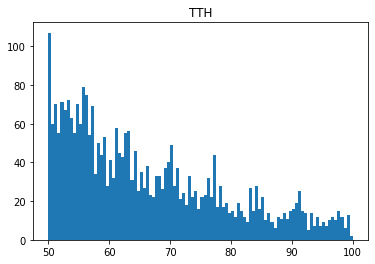

In [80]:
fig, ax = plt.subplots(1, 1)
ax.hist(df_tth['TTH'][(df_tth['TTH']<100)&(df_tth['TTH']>50)],bins=100)
ax.set_title("TTH")
plt.show()

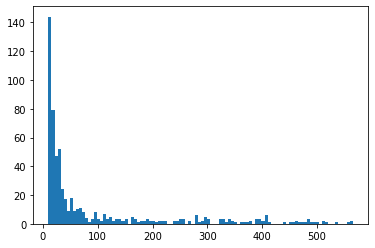

In [82]:
fig, ax = plt.subplots(1,1)
ax.hist(df_fits['action_time'][(df_fits['stage_name']=='Обработка') & (df_fits['action_time']>10)], bins = 100)
plt.show()

In [108]:
df_fits['action_time'].quantile(.99)

16.344747322910056

In [112]:
df_fits[df_fits['id_partner']==1040329]

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action,action_time,is_fits
0,0,4886615,1040329,-1,27473,2020-04-14 11:08:56.073512+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False,0.000152,0.0
1,1,4886615,1040329,27106021,27473,2020-04-14 11:09:09.164995+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False,0.000015,0.0
2,2,4886615,1040329,27106023,27473,2020-04-14 11:09:10.460392+00:00,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False,0.000017,0.0
3,3,4886615,1040329,27106025,27473,2020-04-14 11:09:11.898599+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,True,False,0.000014,0.0
4,4,4886615,1040329,27106027,27473,2020-04-14 11:09:13.091460+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False,0.000014,0.0
5,5,4886615,1040329,27106030,27473,2020-04-14 11:09:14.324975+00:00,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,True,False,0.000012,0.0
6,6,4886615,1040329,27106031,27473,2020-04-14 11:09:15.338565+00:00,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False,0.000016,0.0
7,7,4886615,1040329,27106032,27473,2020-04-14 11:09:16.725966+00:00,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False,0.000019,0.0
8,8,4886615,1040329,27106033,27473,2020-04-14 11:09:18.335061+00:00,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,True,False,0.000060,0.0
9,9,4886615,1040329,27106034,27473,2020-04-14 11:09:23.492070+00:00,Оформление,Узнать результаты приема,Принят,Продавец-кассир,True,False,NaN,1.0


In [73]:
df_tth['TTH'][df_tth['TTH']>100]

481       436.498010
864       138.904074
2153      333.120726
2232      389.491564
2290      420.412513
             ...    
184010    209.210777
189244    212.262904
191023    206.170527
192096    203.253971
193137    196.460519
Name: TTH, Length: 430, dtype: float64

In [100]:

df_fits[df_fits['id_applicant'] == 2285890]
# df_fits[(df_fits['department_id'] == 10171)&(df_fits['stage_name'] == 'СБ')]
# df_fits[df_fits['result_name'] == 'Отказ руководителя']
# df_fits[(df_fits['stage_name'] == 'Интервью с руководителем')&(df_fits['action_time'] > 500)]

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action,action_time,is_fits,Date_int
2323580,10270754,2285890,2440652,-1,32479,2018-02-01 13:34:53.177667+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0,0.000206,0.0,1517492093177667000
2323581,10270755,2285890,2440652,11353828,32479,2018-02-01 13:35:10.940901+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,1,0,0.000569,0.0,1517492110940901000
2323582,10270756,2285890,2440652,11353856,32479,2018-02-01 13:36:00.117354+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,1,0,3.894447,0.0,1517492160117354000
2323583,10270757,2285890,2440652,11395317,32479,2018-02-05 11:04:00.357438+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Нет обратной связи,Продавец-кассир,1,0,3.135198,0.0,1517828640357438000
2323584,10270758,2285890,2440652,11478290,32479,2018-02-08 14:18:41.442008+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Нет обратной связи,Продавец-кассир,1,0,532.894660,0.0,1518099521442008000
2323585,10270759,2285890,2440652,21043988,32479,2019-07-26 11:47:00.033687+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,1,0,0.000033,0.0,1564141620033687000
2323586,10270760,2285890,2440652,21043989,32479,2019-07-26 11:47:02.868318+00:00,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,1,0,0.148004,0.0,1564141622868318000
2323587,10270761,2285890,2440652,21055399,32479,2019-07-26 15:20:10.434492+00:00,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,1,0,0.000015,0.0,1564154410434492000
2323588,10270762,2285890,2440652,21055401,32479,2019-07-26 15:20:11.721391+00:00,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,1,0,3.012982,0.0,1564154411721391000
2323589,10270763,2285890,2440652,21084361,32479,2019-07-29 15:38:53.368619+00:00,Оформление,Назначить время на оформление/медосмотр,Недозвон,Продавец-кассир,1,0,3.042352,0.0,1564414733368619000


In [75]:
stage_name = 'Интервью с руководителем'
stage_series = df_fits['action_time'][df_fits['stage_name'] == stage_name]
time_threshold = stages_g.loc[stage_name]['75%']

# df.iloc[stage_series[stage_series.values > time_threshold].index]

In [121]:
amount_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
amount_applicant =  amount_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
amount_applicant[amount_applicant['id_applicant']>3]

,id_partner,id_applicant
192,546458,5
3524,747915,4
4775,825759,4
10227,1188893,4
10590,1209984,4
20812,1782418,4
26844,2081095,4
30715,2246831,6
39719,2420286,4
41372,2431571,4


In [122]:
df_fits[df_fits['id_partner'] == 2246831]

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action,action_time,is_fits
1003285,4463296,3452928,2246831,-1,9846,2019-02-14 14:03:12.772834+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False,0.000186,0.0
1003286,4463297,3452928,2246831,17854574,9846,2019-02-14 14:03:28.844296+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False,0.000009,0.0
1003287,4463298,3452928,2246831,17854575,9846,2019-02-14 14:03:29.641256+00:00,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False,0.000011,0.0
1003288,4463299,3452928,2246831,17854576,9846,2019-02-14 14:03:30.621105+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,True,False,0.000009,0.0
1003289,4463300,3452928,2246831,17854579,9846,2019-02-14 14:03:31.422452+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False,0.000009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376235,10557078,2227860,2246831,11278471,9860,2018-01-29 14:49:58.708734+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,True,False,0.794182,0.0
2376236,10557079,2227860,2246831,11289899,9860,2018-01-30 09:53:36.004871+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,True,False,0.102008,0.0
2376237,10557080,2227860,2246831,11298025,9860,2018-01-30 12:20:29.469403+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,True,False,1.963474,0.0
2376238,10557081,2227860,2246831,11346673,9860,2018-02-01 11:27:53.626744+00:00,Оформление,Узнать результаты приема,В ожидании,Продавец-кассир,True,False,0.062492,0.0


In [76]:
# df.iloc[df[df['stage_name'] == 'Групповое собеседование и тестирование'].index+1]
# print(len(stages[stages['count'] > stage_threshold]))
# df.iloc[df[df['action_time'] < 0].index + 1]
# df[df['activity_name'] == 'Провести первичную обработку']

In [77]:
import matplotlib.pyplot as plt

def showHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    fig, axs = plt.subplots(xy, xy, figsize=(20,15))
    i = 0
    not_special_const = 5
    
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        time_threshold = not_special_const
        if is_special and col in grouped_data.index:
            time_threshold = grouped_data.loc[col]['75%']
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            i+=1
#             axs[x,y].set_ylabel('Кол-во')
            axs[x,y].set_xlabel(f'{col}, {col_len}')
            series[series.values < time_threshold].hist(ax=axs[x,y],bins=100)
        print('.', end = '')
    plt.show()

def checkShowHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    not_special_const = 5
    if is_special and len(data[column_name].unique()) != len(grouped_data):
        print('Not all columns in grouped_data')
    
    i = 0
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            if x > xy or y > xy:
                print(f'Too many columns in data for diagramm {xy}*{xy}')                
            i+=1

.................

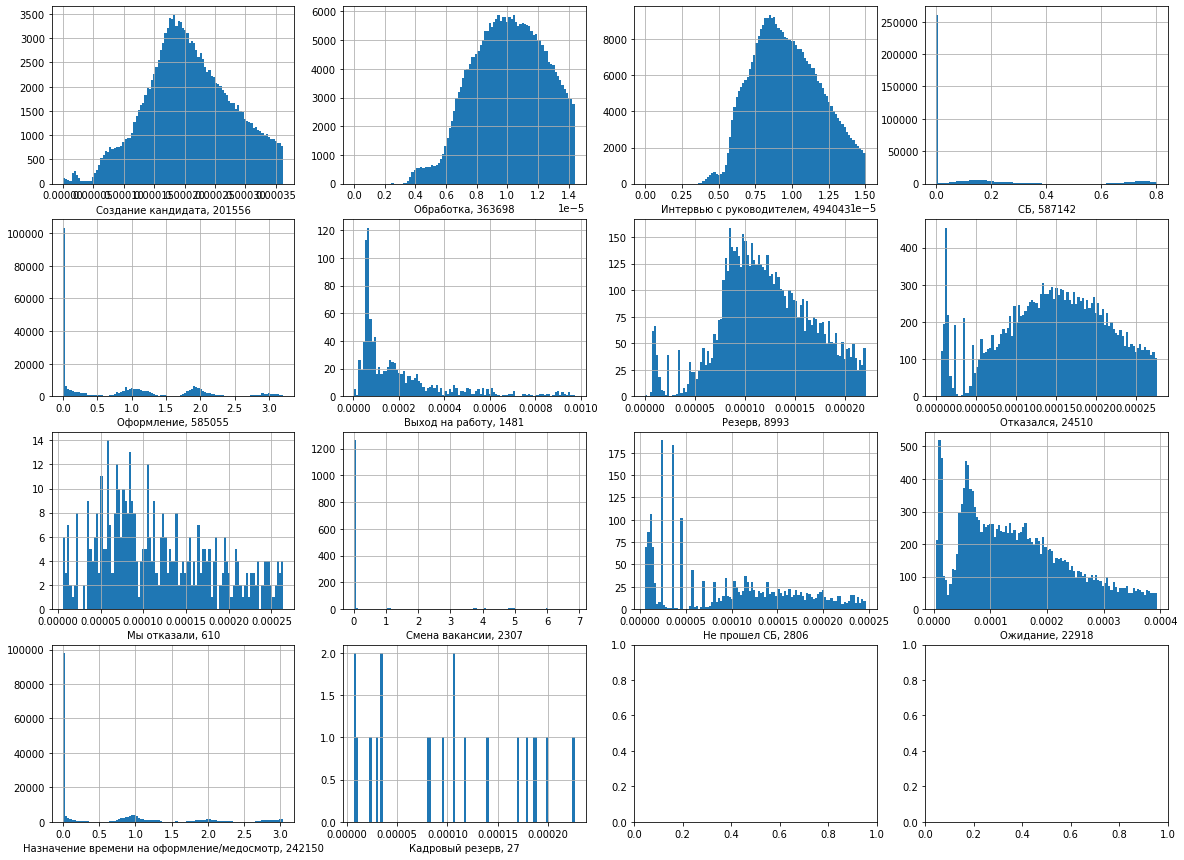

In [86]:
showHist(df_fits, stages_g, 'stage_name', stage_threshold)

......................

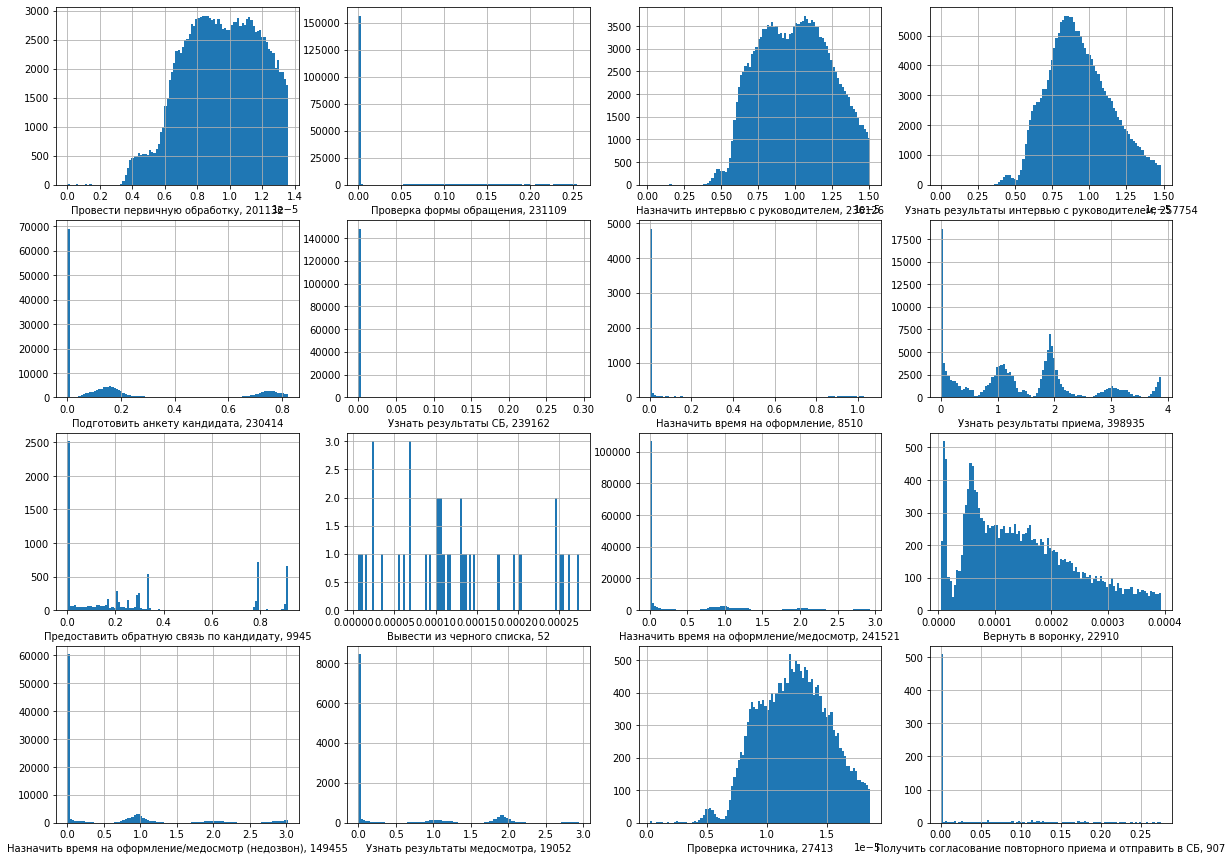

In [90]:
showHist(df_fits, activities_g, 'activity_name', activity_threshold, True)

.....................................

IndexError: index 6 is out of bounds for axis 0 with size 6

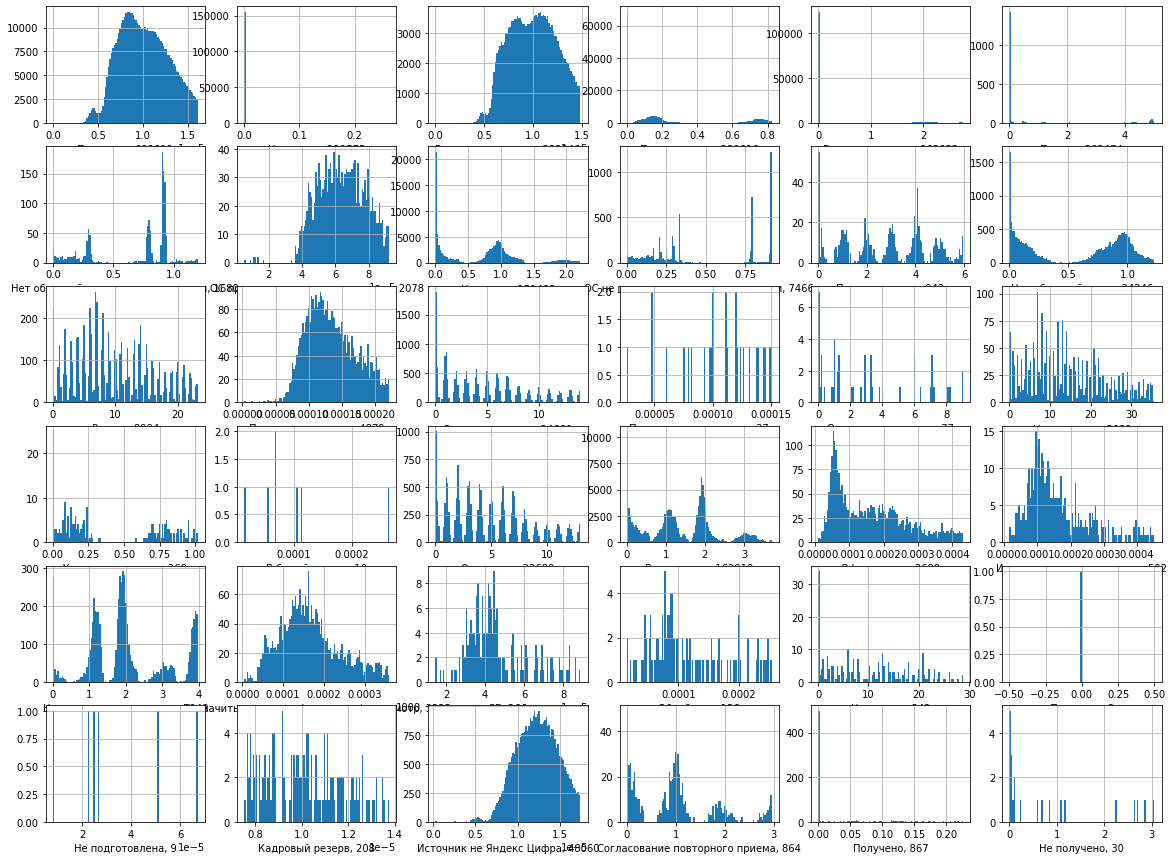

In [94]:
showHist(df_fits, results_g, 'result_name', result_threshold, True, 6)

# Создание связи по активностям аппликанта

читаем только файл 2020 года

In [17]:
df2020 = pd.read_csv(PATHES[2])
df2020 = df2020[df2020['position_name'] == 'Продавец-кассир']

# сортируем, чтобы видеть активности по одному аппилканту в соответствии с датой и временем
df2020.sort_values(by=['id_applicant','action_date'], ascending = [False,True], inplace = True)

# делаем ресет индекс, чтоб было удобней сортировать и работать со строками
df2020.reset_index(inplace= True)
# создаем колонку next_id, куда будем записывать эти самые айдишники,уже по отсортированному датафрейму
df2020['next_id']= df2020.index + 1
# берем index stage_name`a на создании кандидата, а затем делаем -1, и записываем в оканчивающиеся поля значения NaN
df2020.iloc[df2020[df2020['stage_name'] == 'Создание кандидата'].index]
df2020['next_id'].iloc[df2020[df2020['stage_name']== 'Создание кандидата'].index -1] = None

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
df2020_short = pd.DataFrame(df2020[['stage_name', 'activity_name', 'result_name', 'next_id']])
df2020_short.dropna(subset=['next_id'], inplace = True)

next_columns = {'stage_name':'next_stage','activity_name':'next_activity','result_name':'next_result'}
for next_ in next_columns.items():
    next_steps = df2020[next_[0]].loc[df2020_short['next_id']]
    next_steps.index = df2020_short.index
    df2020_short[next_[1]] = next_steps

df2020_short

,stage_name,activity_name,result_name,next_id,next_stage,next_activity,next_result
0,Создание кандидата,NaN,NaN,1.0,Обработка,Провести первичную обработку,Подходит
1,Обработка,Провести первичную обработку,Подходит,2.0,Обработка,Проверка формы обращения,Не резерв
2,Обработка,Проверка формы обращения,Не резерв,3.0,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена
3,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,4.0,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит
4,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,5.0,СБ,Подготовить анкету кандидата,Подготовлена
...,...,...,...,...,...,...,...
527445,Создание кандидата,NaN,NaN,527446.0,Не прошел СБ,Вывести из черного списка,В белый список
527456,Создание кандидата,NaN,NaN,527457.0,Не прошел СБ,Вывести из черного списка,В белый список
527489,Создание кандидата,NaN,NaN,527490.0,Не прошел СБ,Вывести из черного списка,В белый список
527502,Создание кандидата,NaN,NaN,527503.0,Не прошел СБ,Вывести из черного списка,В белый список


# Построение графов

In [149]:
df2020_stages = df2020_short.groupby(['stage_name','next_stage']).size().reset_index()

G = nx.Graph()
G=nx.from_pandas_edgelist(df2020_stages, 'stage_name', 'next_stage')
nt = Network('1000px', '1000px')
nt.from_nx(G)
nt.show('stage.html')

In [150]:
df2020_activity = df2020_short.groupby(['activity_name','next_activity']).size().reset_index()

G = nx.Graph()
G=nx.from_pandas_edgelist(df2020_activity, 'activity_name', 'next_activity')
nt = Network('1000px', '1000px')
nt.from_nx(G)
nt.show('activity.html')

In [151]:
df2020_result = df2020_short.groupby(['result_name','next_result']).size().reset_index()

G = nx.Graph()
G=nx.from_pandas_edgelist(df2020_result, 'result_name', 'next_result')
nt = Network('1000px', '1000px')
nt.from_nx(G)
nt.show('result.html')

# Замечание! 
заменить float значения колонки next_id на int

In [14]:
#df2020["next_id"] = df2020["next_id"].astype(int) # пишет что не может NaN сконвертить в инт, тут надо подумать

А здесь мы просто смотрели, что-то)) и думали, стоит ли убирать медосмотр или будем его учитывать. В итоге мы решили что будем брать только данные за 2020 год

In [33]:
df2020[df2020['activity_name']== 'Создание кандидата'].index

Int64Index([], dtype='int64')

In [16]:
df12 = df11

In [ ]:
#df12.loc[(for appl in df12['id_applicant']), 'activity_name'] = df12['activity_name']

In [ ]:
df

In [27]:
df[df['stage_name'] == 'Назначение времени на оформление/медосмотр' ]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
1131318,2938092,2800942,15154266,25031,2018-09-06 09:05:54.978772+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,1,0
1131328,2586861,2599642,12963548,25031,2018-05-17 17:12:58.780336+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Резерв,Продавец-кассир,1,0
1131380,2294844,2445219,11412346,27472,2018-02-06 09:23:02.652827+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,1,0
1131400,2575961,2104304,12877577,9690,2018-05-14 12:47:09.688594+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр,Время назначено,Продавец-кассир,1,0
1131434,2557905,1873453,12798772,29597,2018-05-08 15:13:49.526816+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр (недоз...,Время назначено,Продавец-кассир,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6353557,3359984,3050771,-1,12178,2020-04-23 15:38:59.865221+00,Назначение времени на оформление/медосмотр,Узнать результаты медосмотра,NaN,Продавец-кассир,1,1
6370568,3364380,3053067,-1,11870,2020-04-23 15:38:59.865221+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр (недоз...,NaN,Продавец-кассир,1,1
6370622,3520204,3141403,-1,7481,2020-04-23 15:38:59.865221+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр (недоз...,NaN,Продавец-кассир,1,1
6370714,3456712,3105692,-1,8963,2020-04-23 15:38:59.865221+00,Назначение времени на оформление/медосмотр,Назначить время на оформление/медосмотр (недоз...,NaN,Продавец-кассир,1,1


In [31]:
по stage_name других годов

array(['Создание кандидата', 'СБ', 'Обработка',
       'Назначение времени на оформление/медосмотр',
       'Интервью с руководителем', 'Оформление', 'Смена вакансии',
       'Отказался', 'Ожидание', 'Резерв', 'Не прошел СБ', 'Мы отказали',
       'Выход на работу', 'Кадровый резерв', 'Черный список',
       'Гайд-интервью', 'Групповое собеседование и тестирование',
       'Выход состоялся'], dtype=object)

In [34]:
по stage_name 2020

array(['Создание кандидата', 'Интервью с руководителем', 'Обработка',
       'Оформление', 'Смена вакансии', 'СБ', 'Не прошел СБ', 'Отказался',
       'Мы отказали', 'Резерв', 'Выход на работу', 'Черный список'],
      dtype=object)